## Siri Real Estate Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,X1 transaction date,X2 house age,X3 distance to the nearest Railway station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.1,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.2,19.5,306.59470,9,24.98034,121.53951,42.2
2,2012.3,13.3,561.98450,5,24.98746,121.54391,47.3
3,2012.4,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.5,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   X1 transaction date                         414 non-null    float64
 1   X2 house age                                410 non-null    float64
 2   X3 distance to the nearest Railway station  414 non-null    float64
 3   X4 number of convenience stores             414 non-null    int64  
 4   X5 latitude                                 414 non-null    float64
 5   X6 longitude                                414 non-null    float64
 6   Y house price of unit area                  414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [5]:
housing['X1 transaction date'].value_counts()

X1 transaction date
2022.4    4
2023.1    4
2022.1    4
2022.2    4
2022.3    4
         ..
2010.5    2
2010.3    2
2010.2    2
2010.1    2
2010.4    2
Name: count, Length: 140, dtype: int64

In [6]:
housing.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest Railway station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,410.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2017.505072,17.811707,1083.885689,4.094203,24.969030,121.533361,37.980193
std,3.963996,11.393408,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2010.100000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2014.125000,9.100000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2017.600000,16.200000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2021.000000,28.350000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2024.000000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [7]:
%matplotlib inline

array([[<Axes: title={'center': 'X1 transaction date'}>,
        <Axes: title={'center': 'X2 house age'}>,
        <Axes: title={'center': 'X3 distance to the nearest Railway station'}>],
       [<Axes: title={'center': 'X4 number of convenience stores'}>,
        <Axes: title={'center': 'X5 latitude'}>,
        <Axes: title={'center': 'X6 longitude'}>],
       [<Axes: title={'center': 'Y house price of unit area'}>, <Axes: >,
        <Axes: >]], dtype=object)

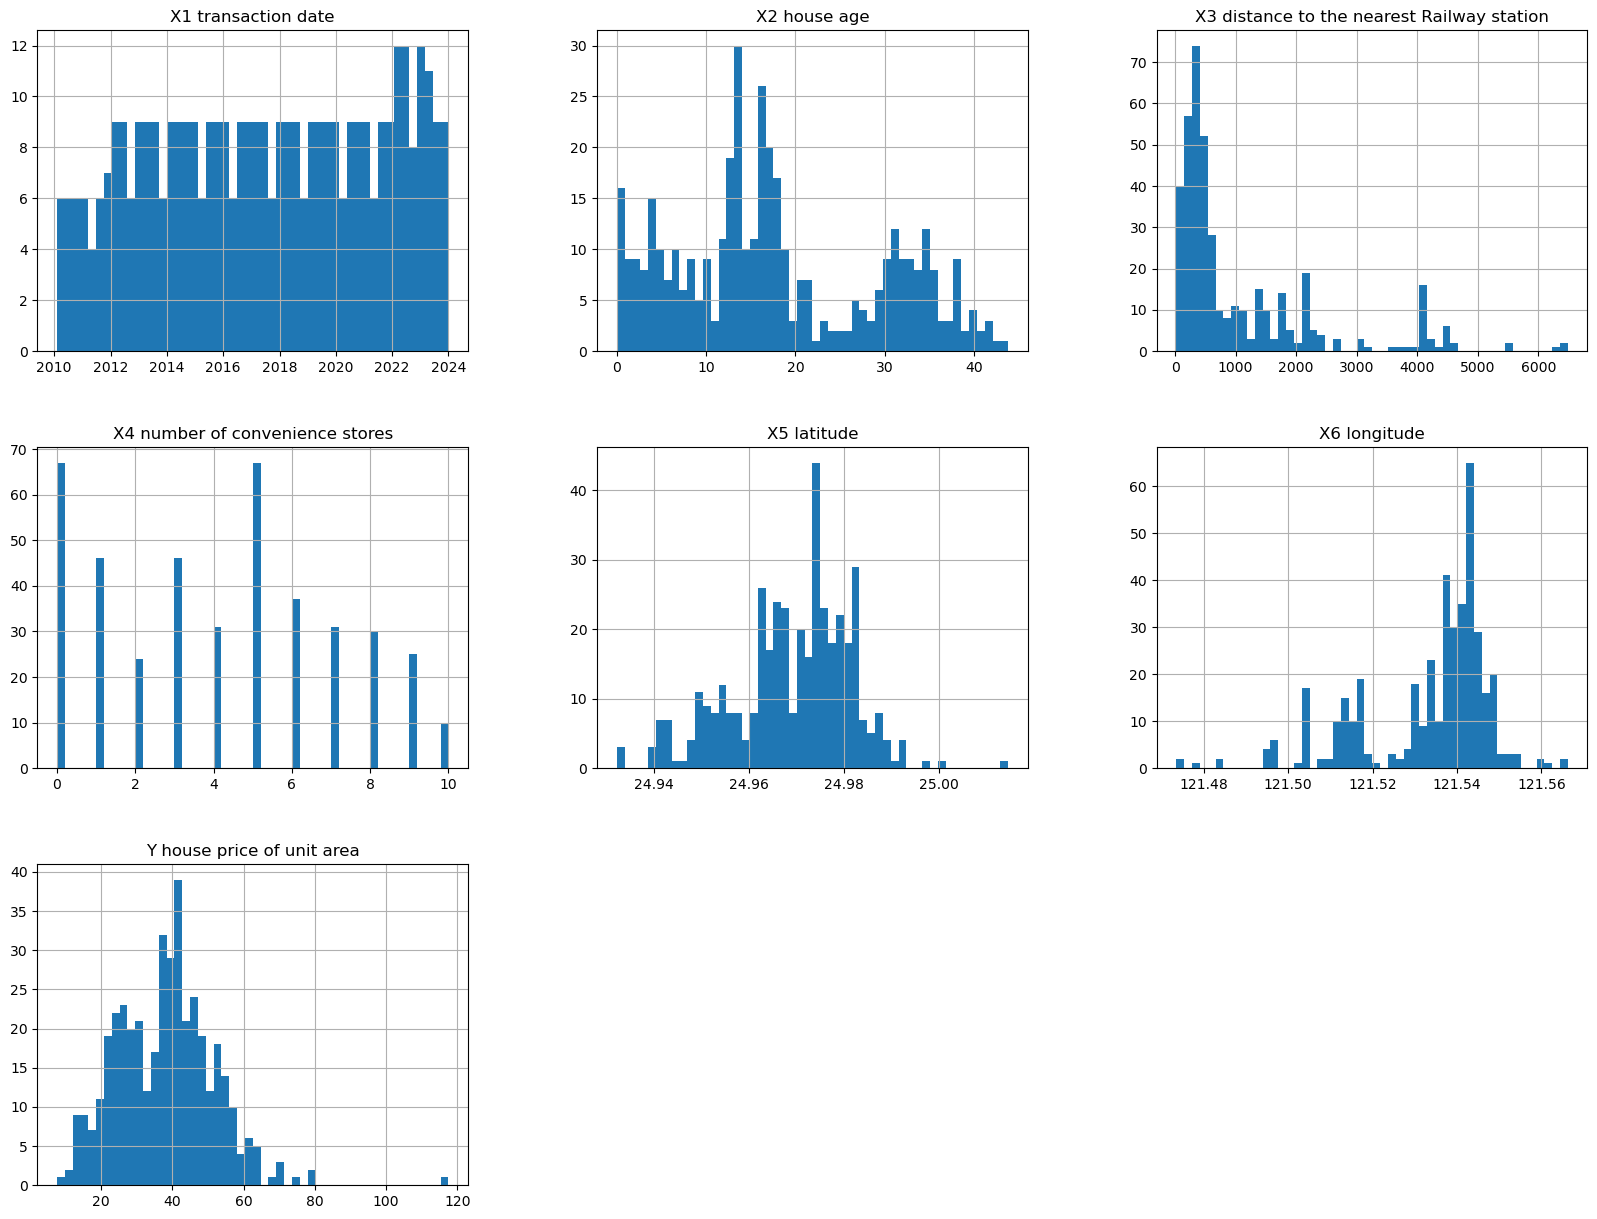

In [8]:
# For plotting Histogram
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))

## Train-Test Splitting

In [9]:
#For learning pupose
import numpy as np
np.random.seed(42)
def split_train_test(data, test_ratio):
    shuffled= np.random.permutation(len(data))
    print(shuffled)
    test_set_size= int(len(data)* test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
#train_set, test_set= split_train_test(housing, 0.2)

In [11]:
#print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 331
Rows in test set: 83



In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['X4 number of convenience stores']):
    strat_train_set= housing.loc[train_index]
    strat_test_set= housing.loc[test_index]

In [14]:
strat_test_set['X4 number of convenience stores'].value_counts()

X4 number of convenience stores
5     14
0     14
3      9
1      9
6      7
4      6
7      6
8      6
9      5
2      5
10     2
Name: count, dtype: int64

In [15]:
housing = strat_train_set.copy()

## Looking for Correlations

In [16]:
corr_matrix = housing.corr()

In [17]:
corr_matrix['Y house price of unit area'].sort_values(ascending=False)

Y house price of unit area                    1.000000
X4 number of convenience stores               0.636209
X5 latitude                                   0.569626
X6 longitude                                  0.535064
X1 transaction date                          -0.038024
X2 house age                                 -0.172457
X3 distance to the nearest Railway station   -0.692165
Name: Y house price of unit area, dtype: float64

array([[<Axes: xlabel='Y house price of unit area', ylabel='Y house price of unit area'>,
        <Axes: xlabel='X4 number of convenience stores', ylabel='Y house price of unit area'>,
        <Axes: xlabel='X2 house age', ylabel='Y house price of unit area'>,
        <Axes: xlabel='X3 distance to the nearest Railway station', ylabel='Y house price of unit area'>],
       [<Axes: xlabel='Y house price of unit area', ylabel='X4 number of convenience stores'>,
        <Axes: xlabel='X4 number of convenience stores', ylabel='X4 number of convenience stores'>,
        <Axes: xlabel='X2 house age', ylabel='X4 number of convenience stores'>,
        <Axes: xlabel='X3 distance to the nearest Railway station', ylabel='X4 number of convenience stores'>],
       [<Axes: xlabel='Y house price of unit area', ylabel='X2 house age'>,
        <Axes: xlabel='X4 number of convenience stores', ylabel='X2 house age'>,
        <Axes: xlabel='X2 house age', ylabel='X2 house age'>,
        <Axes: xlabel='X3

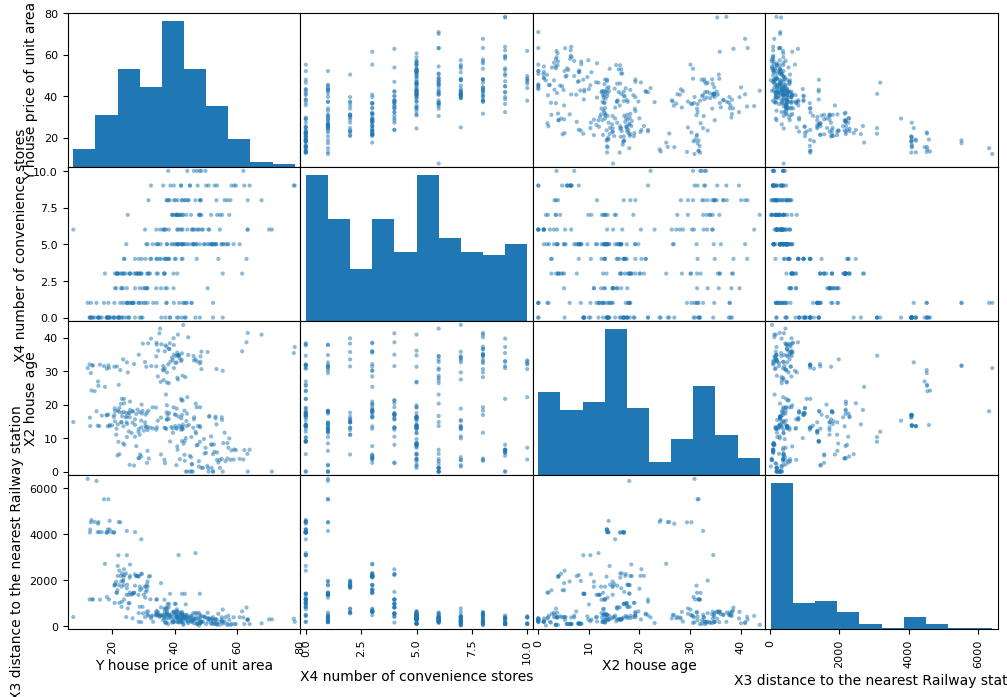

In [18]:
from pandas.plotting import scatter_matrix
attributes = ["Y house price of unit area","X4 number of convenience stores","X2 house age","X3 distance to the nearest Railway station"]
scatter_matrix(housing[attributes], figsize= (12,8))

<Axes: xlabel='X4 number of convenience stores', ylabel='Y house price of unit area'>

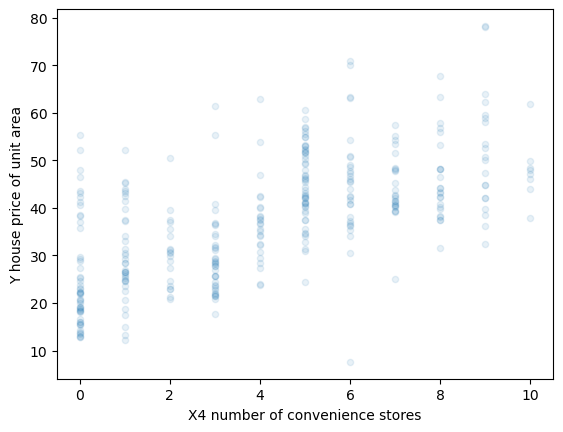

In [19]:
housing.plot(kind="scatter", x="X4 number of convenience stores", y="Y house price of unit area" , alpha=0.1)

In [20]:
housing = strat_train_set.drop("Y house price of unit area", axis=1)
housing_labels = strat_train_set["Y house price of unit area"].copy()

## Missing Attributes

In [21]:
# To take care of missing attributes, you have three options:
#  1. Get rid of the missing data points
#  2. Get rid of the whole attribute
#  3. Set the value to some value(0, mean or median)

In [22]:
a=housing.dropna(subset=["X2 house age"])#option 1
a.shape
# Note that the original housing dataframe will remain unchanged

(328, 6)

In [23]:
housing.drop("X2 house age", axis=1).shape  #Option 2
# Note that there is no X2 house age column and also note that the original housing dataframe will remain unchanged

(331, 5)

In [24]:
median = housing["X2 house age"].median()

In [25]:
housing["X2 house age"].fillna(median)  #Option 3
#Note that the original housing dataframe will remain unchanged

369    20.2
360    32.9
180    26.9
188    34.8
404    16.4
       ... 
10     34.8
381     8.0
159    15.5
141     5.1
292    17.5
Name: X2 house age, Length: 331, dtype: float64

In [26]:
housing.shape

(331, 6)

In [27]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [28]:
imputer.statistics_.shape

(6,)

In [29]:
X = imputer.transform(housing)

In [30]:
housing_tr = pd.DataFrame(X, columns = housing.columns)

In [31]:
housing_tr.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest Railway station,X4 number of convenience stores,X5 latitude,X6 longitude
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,2017.506647,18.113897,1080.612966,4.102719,24.969250,121.533541
std,3.929201,11.430991,1250.250085,2.944182,0.012326,0.015267
min,2010.100000,0.000000,23.382840,0.000000,24.933630,121.475160
25%,2014.150000,9.800000,289.324800,1.000000,24.963050,121.529675
50%,2017.500000,16.200000,492.231300,4.000000,24.971100,121.538440
75%,2020.950000,29.600000,1448.504000,6.000000,24.978045,121.543395
max,2024.000000,43.800000,6396.283000,10.000000,25.014590,121.566270


## Scikit-learn Design

Primarily, three types of objects
1. Estimators- It estimates some parameter based on a dataset. Eg. imputer- It has a fit method and transform method.
 Fit method- Fits the darkest and calculates internal parameters

2. Transformers - transform method takes input and returns output based on the learning from fit(). It also has a convenience function called fit_transform() which fits and then transforms.

3. Predictors- LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score function which will evaluate the predictions.

## Feature Scaling

Two types of feature scaling methods:
1. Min-Max scaling (Normalization)
   (value-min)/(max-min)
    Sklearn provides a class called MinMaxScaler for this 
2. Standardization
    (value-mean)/std
     Sklearn provides a class called Standard Scaler for this


## Creating a Pipeline

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer' , SimpleImputer(strategy = "median")),
    ('std_scaler', StandardScaler()),
])

In [33]:
housing_num_tr = my_pipeline.fit_transform(housing_tr)

## Selecting a desired model for Siri Real Estates

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
#model = LinearRegression()
#model = DecisionTreeRegressor()
#model = RandomForestRegressor()
model = GradientBoostingRegressor()
#model = SVR()
model.fit(housing_num_tr, housing_labels)

GradientBoostingRegressor()

In [35]:
some_data = housing.iloc[:5]

In [36]:
some_labels = housing_labels.iloc[:5]

In [37]:
prepared_data = my_pipeline.transform(some_data)

In [38]:
model.predict(prepared_data)

array([24.91910733, 45.8157593 , 16.51403507, 45.3109137 , 47.56285198])

In [39]:
list(some_labels)

[22.8, 47.1, 15.5, 44.3, 41.2]

## Evaluating the Model

In [40]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)

In [41]:
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [42]:
rmse

3.359773260294917

## Using better evaluation techniques - Cross Validation

In [43]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [44]:
rmse_scores

array([5.58197129, 8.70212568, 4.76905631, 8.11490571, 8.4799355 ,
       4.86049819, 5.71785442, 6.7803817 , 5.79190567, 8.48898337])

In [45]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [46]:
print_scores(rmse_scores)

Scores: [5.58197129 8.70212568 4.76905631 8.11490571 8.4799355  4.86049819
 5.71785442 6.7803817  5.79190567 8.48898337]
Mean:  6.728761783512252
Standard deviation:  1.5009606917448657


## Saving the model

In [47]:
from joblib import dump, load
dump(model, 'Siri.joblib')

['Siri.joblib']

## Testing the model on test data

In [48]:
X_test= strat_test_set.drop("Y house price of unit area", axis=1)
Y_test= strat_test_set["Y house price of unit area"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[48.21924838 46.30609293 15.97612725 24.43083926 49.71888882 27.08461322
 42.30607813 25.74537267 37.79416873 45.66493267 27.06741567 57.17246679
 48.86486022 25.40893774 58.16112914 36.2765251  16.37940173 46.01235977
 42.61572372 38.9229844  50.51700702 39.26261727 31.96815965 28.12741691
 25.68233295 39.76309797 50.33934942 22.10579018 34.39315394 40.48355847
 26.73640807 38.82118333 49.62173947 44.89802846 19.48204701 36.83439186
 48.91864112 24.13947063 34.66580806 18.72818013 39.65625549 51.09492236
 42.09551502 42.01168504 25.62618036 56.69129064 44.14553704 29.52707458
 25.27370595 53.37219943 48.7831979  40.18988059 18.3683096  48.99942265
 49.83462593 51.0086115  50.71620489 52.24115453 64.13290233 36.92723784
 38.24057254 18.62715557 28.19741126 41.41182416 25.05374067 28.19314101
 41.5683383  62.17067303 17.61000709 38.96877939 43.26361628 26.0745942
 32.59633428 47.95061687 40.72754376 22.83195913 56.97007106 26.61087591
 42.61572372 18.91056323 50.21381726 52.86588628 47.

In [49]:
final_rmse

10.13035721746258

In [50]:
prepared_data[0]

array([ 0.89042078,  0.18277164,  0.88477281, -0.37510886, -0.48993566,
       -1.38876478])

## Using the model

In [51]:
from joblib import dump, load
import numpy as np
model = load('Siri.joblib') 
features = np.array([[-1.69732575,  0.18277164,  0.88477281, -0.37510886, -0.48993566,
       -1.38876478]])
model.predict(features)

array([25.39273454])